# Colombia

Import library

In [ ]:
!pip install sodapy

In [ ]:
from sodapy import Socrata
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter

client = Socrata("www.datos.gov.co", None) #Se determina la dirección de la cual se extraeran los datos
results = client.get("gt2j-8ykr", limit=1083321) #Se obtienen los datos y se establece un límite

# Convertir a dataframe de pandas
results_df = pd.DataFrame.from_records(results)
df=results_df
df = df.replace({'LEVE':'Leve'})
df = df.replace({'leve':'Leve'})
df = df.replace({'moderado':'Moderado'})
df = df.replace({'En Estudio':'En estudio'})
df = df.replace({'EN ESTUDIO':'En estudio'})
df = df.replace({'relacionado':'Relacionado'})
df = df.replace({'RELACIONADO':'Relacionado'})

df.columns

Index(['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificaci_n',
       'departamento', 'departamento_nom', 'ciudad_municipio',
       'ciudad_municipio_nom', 'edad', 'unidad_medida', 'sexo',
       'fuente_tipo_contagio', 'ubicacion', 'estado', 'pais_viajo_1_cod',
       'pais_viajo_1_nom', 'recuperado', 'fecha_inicio_sintomas',
       'fecha_diagnostico', 'fecha_recuperado', 'tipo_recuperacion',
       'per_etn_', 'fecha_muerte', 'nom_grupo_'],
      dtype='object')

In [ ]:
df=results_df

df=df.fillna('No Definido') #Se llenan los datos vacíos
tupla = (("T00:00:00.000", ""),("-", "/"))
for c in df.index:
    for a, b in tupla:
        df['fecha_de_notificaci_n'][c] = df['fecha_de_notificaci_n'][c].replace(a, b)
        df['fecha_inicio_sintomas'][c] = df['fecha_inicio_sintomas'][c].replace(a, b)
        df['fecha_diagnostico'][c] = df['fecha_diagnostico'][c].replace(a, b)
        df['fecha_recuperado'][c] = df['fecha_recuperado'][c].replace(a, b)
        df['fecha_reporte_web'][c] = df['fecha_reporte_web'][c].replace(a, b)
        df['fecha_muerte'][c] = df['fecha_muerte'][c].replace(a, b)
df.head()

KeyboardInterrupt: ignored

In [ ]:
#Se convierten los datos de string a datatime object
for c in df.index:
    if(df['fecha_de_notificaci_n'][c]!='No Definido'):
        df['fecha_de_notificaci_n'][c]=datetime.strptime(df['fecha_de_notificaci_n'][c], '%d/%m/%Y')
    if(df['fecha_inicio_sintomas'][c]!='No Definido'):
        df['fecha_inicio_sintomas'][c]=datetime.strptime(df['fecha_inicio_sintomas'][c], '%d/%m/%Y')
    if(df['fecha_recuperado'][c]!='No Definido'):
        df['fecha_recuperado'][c]=datetime.strptime(df['fecha_recuperado'][c], '%d/%m/%Y')
    if(df['fecha_reporte_web'][c]!='No Definido'):
        df['fecha_reporte_web'][c]=datetime.strptime(df['fecha_reporte_web'][c], '%d/%m/%Y')
    if(df['fecha_muerte'][c]!='No Definido'):
        df['fecha_muerte'][c]=datetime.strptime(df['fecha_muerte'][c], '%d/%m/%Y')

In [ ]:
x=[] 
x=df['fecha_de_notificaci_n'] #Se llena con la fecha de notificación 
c=Counter(x) #Se cuentan los datos según la fecha de notificación

In [ ]:
df1 = pd.DataFrame() #Se crea una nueva referencia del DataFrame
df1['Fecha']=c.keys() #Se extraen los elementos únicos
df1['No. Casos']=c.values() #Se extrae la frecuencia de cada elemento único

In [ ]:
df1=df1.sort_values(by='Fecha') #Se ordenan según la fecha 

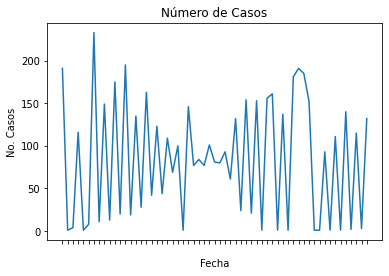

In [ ]:
plt.xticks(rotation=120)
x = df1['Fecha'] #Se asignan los valores al eje x
y = df1['No. Casos'] #Se asignan los valores al eje y
plt.plot(x,y) #Se grafica
plt.xticks([0, 200, 400, 600])
plt.title('Número de Casos')
plt.xlabel('Fecha')
plt.ylabel('No. Casos')
plt.savefig('Número de Casos.png') #Se guarda la imagen

In [ ]:
import matplotlib
import numpy as np

y=[]
y=df['ciudad_municipio_nom'] #Se llena con la ciudad
d=Counter(y) #Se cuentan los datos según la ciudad 

In [ ]:
df2 = pd.DataFrame()
df2['Ciudad']=d.keys() #Se extraen los elementos únicos
df2['No. Casos']=d.values() #Se extrae la frecuencia de cada elemento único
df2=df2.sort_values(by='No. Casos',ascending=False) #Se ordena según el número de casos 

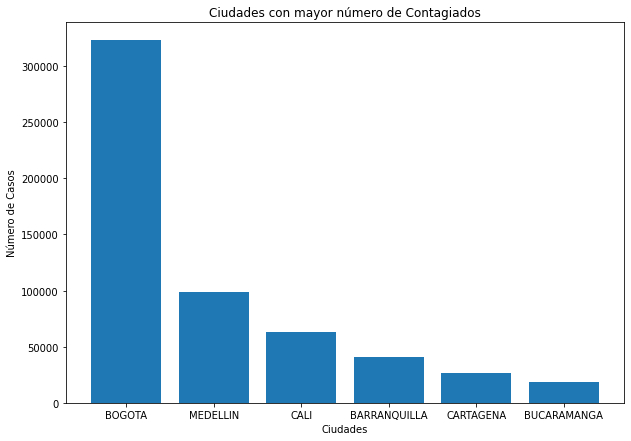

In [ ]:
plt.figure(figsize=(10,7)) #Se establece el tamaño de la figura
#Colocamos etiquetas a los ejes
plt.xlabel("Ciudades")                       
plt.ylabel("Número de Casos") 

#Creamos la grafica de barras utilizando 'Ciudad' como eje X y 'Número de casos' como eje y.
x = df2['Ciudad'].iloc[0:6]
y = df2['No. Casos'].iloc[0:6]
plt.title("Ciudades con mayor número de Contagiados")
plt.bar(x, y)
#Finalmente mostramos la grafica con el metodo show()
plt.savefig('Ciudades.png')
plt.show()

In [ ]:
tipo=[]
tipo=df['fuente_tipo_contagio']
#Se cuentan los casos según el tipo de contagio
e=Counter(tipo)
df3 = pd.DataFrame()
#Se establecen los elementos y la frecuencia de cada uno
df3['Tipo']=e.keys()
df3['No. Casos']=e.values()
#Se ordenan
df3=df3.sort_values(by='No. Casos',ascending=False)

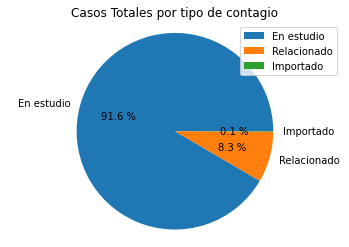

In [ ]:
#Se grafica el diagrama de torta 
plt.pie(df3['No. Casos'], labels=df3['Tipo'], autopct="%0.1f %%")
plt.axis("equal")
plt.legend()
plt.title("Casos Totales por tipo de contagio")
plt.savefig('TipoContagio.png')
#Se muestra la grafica
plt.show()

In [ ]:
estado=[]
estado=df['estado']
#Se cuentan los casos según el estado de los pacientes 
f=Counter(estado)
df4 = pd.DataFrame()
#Se establecen los elementos y la frecuencia de cada uno
df4['Estado']=f.keys()
df4['No. Casos']=f.values()
df4=df4.sort_values(by='No. Casos',ascending=False)

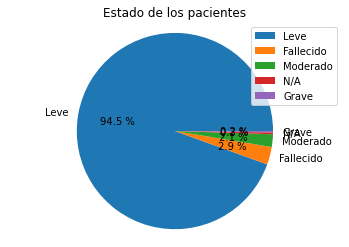

In [ ]:
#Se grafica el diagrama de torta 
plt.pie(df4['No. Casos'], labels=df4['Estado'], autopct="%0.1f %%")
plt.axis("equal")
plt.title("Estado de los pacientes")
plt.legend()
plt.savefig('EstadoPacientes.png')
plt.show()

In [ ]:
muertes=[]
muertes=df['fecha_muerte']
#Se cuentan los casos según la fecha de muerte
g=Counter(muertes)
df5 = pd.DataFrame()
#Se establecen los elementos y la frecuencia de cada uno
df5['Muertes']=g.keys()
df5['No. Casos']=g.values()
df5=df5.sort_values(by='No. Casos',ascending=False)
#Se hace una copia del data frame 
copiamuertes=df5.iloc[1::].copy()

In [ ]:
pais=[]
pais=df['pais_viajo_1_nom']
#Se cuentan los casos según el país de procedencia 
h=Counter(pais)
df6 = pd.DataFrame()
#Se establecen los elementos y la frecuencia de cada uno
df6['Pais de Procedencia']=h.keys()
df6['No. Casos']=h.values()
df6=df6.sort_values(by='No. Casos',ascending=False)
#Se hace una copia del data frame 
df6copy = df6.iloc[1:8].copy()
#Se organizan según el número de casos 
df6copy=df6copy.sort_values(by='No. Casos')


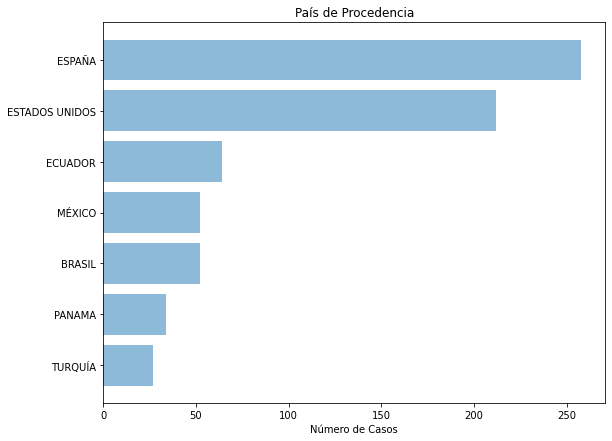

In [ ]:
plt.figure(figsize=(9,7))
#Creamos la grafica pasando los valores en el eje X, Y, donde X = No de Casos y Y = País de Procedencia
x = df6copy['Pais de Procedencia']
y = df6copy['No. Casos']
plt.barh(x, y, align='center', alpha=0.5)
#añadimos una etiqueta en el eje X
plt.xlabel('Número de Casos')
plt.title('País de Procedencia')
plt.savefig('Pais.png')
plt.show()

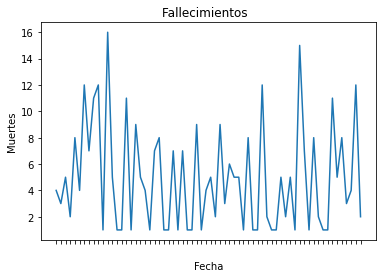

In [ ]:
#Se organiza según el número de muertes 
copiamuertes=copiamuertes.sort_values(by='Muertes')
x = copiamuertes['Muertes']
y = copiamuertes['No. Casos']
#Se grafica
plt.plot(x,y)
plt.xticks(x," ")
plt.title('Fallecimientos  ')
plt.xlabel('Fecha')
plt.ylabel('Muertes')
#Se guarda la gráfica como .png
plt.savefig('Fallecimientos.png')

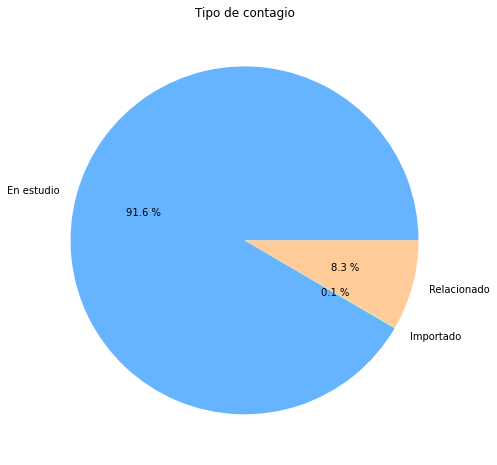

In [ ]:
colors = ['#66b3ff','#99ff99','#ffcc99']
estadoP = df.groupby('fuente_tipo_contagio').size()
estadoP.plot(kind='pie', subplots=True, figsize=(8, 8),colors=colors,autopct="%0.1f %%")
plt.title("Tipo de contagio")
plt.ylabel("")
plt.savefig('TipoDeContagio.png')
plt.show()


**Mapa por departamento**


> Instalación *geopandas*



In [ ]:
!pip install geopandas

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive




> Se carga el *geojson* con las figuras de los departamentos




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file('/gdrive/My Drive/Colab Notebooks/colombia.geo.json')
gdf = gdf.sort_values(by='NOMBRE_DPT')
gdf = gdf.reset_index(drop=True)
gdf.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,91,AMAZONAS,1.100294e+11,2562641.642,1.100294e+07,"POLYGON ((-71.38640 0.11860, -71.37610 0.11160..."
1,05,ANTIOQUIA,6.335186e+10,1963728.843,6.335186e+06,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."
2,81,ARAUCA,2.419638e+10,843446.026,2.419638e+06,"POLYGON ((-70.69870 7.05930, -70.69350 7.05290..."
3,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,4.960252e+07,71946.251,4.960252e+03,"MULTIPOLYGON (((-81.71296 12.59456, -81.71284 ..."
4,08,ATLANTICO,3.360765e+09,240936.172,3.360765e+05,"POLYGON ((-74.87060 10.36120, -74.87640 10.343..."




> Se cambia el nombre de ciudades por los del departamento al que pertenezcan



In [ ]:
df = df.replace({'BARRANQUILLA':'ATLANTICO'})
df = df.replace({'CARTAGENA':'BOLIVAR'})
df = df.replace({'STA MARTA D.E.':'MAGDALENA'})

In [ ]:
x=[] 
x=df['departamento_nom'] #Se llena con la fecha de notificación 
c=Counter(x) #Se cuentan los datos según la fecha de notificación

In [ ]:
df1 = pd.DataFrame() #Se crea una nueva referencia del DataFrame
df1['departamento_nom']=c.keys() #Se extraen los elementos únicos
df1['No. Casos']=c.values() #Se extrae la frecuencia de cada elemento único
df1 = df1.replace({'BOGOTA':'SANTAFE DE BOGOTA D.C'})
df1 = df1.replace({'SAN ANDRES':'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA'})
df1 = df1.replace({'GUAJIRA':'LA GUAJIRA'})
df1= df1.sort_values(by='departamento_nom') #Se ordenan según el dpto
df1 = df1.reset_index(drop=True)
df1.head()

,departamento_nom,No. Casos
0,AMAZONAS,2911
1,ANTIOQUIA,170819
2,ARAUCA,3383
3,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA,1889
4,ATLANTICO,72102


In [ ]:
df1=df1.sort_values(by='departamento_nom') #Se ordenan según el dpto
df1 = df1.reset_index(drop=True)
gdf = gdf.sort_values(by='NOMBRE_DPT')
gdf = gdf.reset_index(drop=True)
gdf['No. Casos'] = df1['No. Casos']
gdf.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,No. Casos
0,91,AMAZONAS,1.100294e+11,2562641.642,1.100294e+07,"POLYGON ((-71.38640 0.11860, -71.37610 0.11160...",2911
1,05,ANTIOQUIA,6.335186e+10,1963728.843,6.335186e+06,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640...",170819
2,81,ARAUCA,2.419638e+10,843446.026,2.419638e+06,"POLYGON ((-70.69870 7.05930, -70.69350 7.05290...",3383
3,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,4.960252e+07,71946.251,4.960252e+03,"MULTIPOLYGON (((-81.71296 12.59456, -81.71284 ...",1889
4,08,ATLANTICO,3.360765e+09,240936.172,3.360765e+05,"POLYGON ((-74.87060 10.36120, -74.87640 10.343...",72102


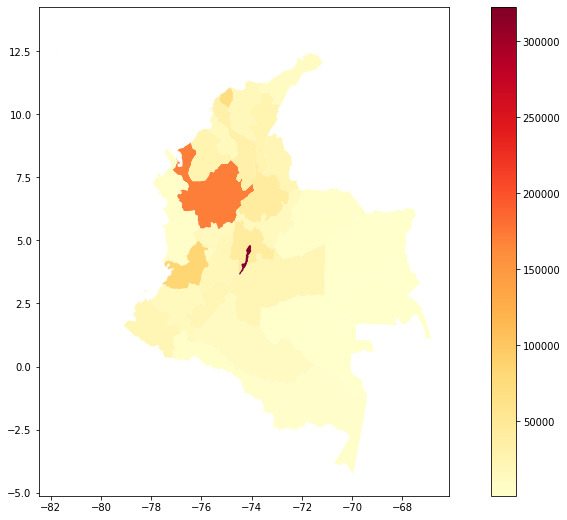

In [ ]:
gdf.plot(column='No. Casos', cmap='YlOrRd', legend=True, figsize=(15,9));
plt.savefig('Casos por departamentos Colombia.png') #Se guarda la imagen



---



# Bogotá






>Se obtienen los datos de Bogotá y se guardan en un dataframe


In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
from urllib.request import urlopen
import json

url = 'https://datosabiertos.bogota.gov.co/api/3/action/datastore_search?resource_id=b64ba3c4-9e41-41b8-b3fd-2da21d627558&limit=300000'  
datos= urlopen(url).read()
data= json.loads(datos)
resultados = data['result']
resultados['records']

resultsBta_df = pd.DataFrame.from_records(resultados['records'])
bta_df=resultsBta_df

In [ ]:
bta_df=bta_df.fillna('No Definido') #Se llenan los datos vacíos
tupla = (("T00:00:00.000", ""),("-", "/"))
for c in bta_df.index:
    for a, b in tupla:
        bta_df['FECHA_DIAGNOSTICO'][c] = bta_df['FECHA_DIAGNOSTICO'][c].replace(a, b)
        bta_df['FECHA_INICIO_SINTOMAS'][c] = bta_df['FECHA_INICIO_SINTOMAS'][c].replace(a, b)

bta_df.head()

In [ ]:
localidades=[] 
x=bta_df['LOCALIDAD_ASIS']  
c=Counter(x) #Se cuentan los datos según las localidades

In [ ]:
local = pd.DataFrame() #Se crea una nueva referencia del DataFrame
local['Localidades']=c.keys() #Se extraen los elementos únicos
local['No. Casos']=c.values() #Se extrae la frecuencia de cada elemento único


In [ ]:
import datetime
fecha=[] 
fecha=bta_df['FECHA_DIAGNOSTICO'] #Se llena con la fecha de notificación 
c=Counter(fecha) #Se cuentan los datos según la fecha de notificación

In [ ]:
fechaN = pd.DataFrame() #Se crea una nueva referencia del DataFrame
fechaN['Fecha']=c.keys() #Se extraen los elementos únicos
fechaN['No. Casos']=c.values() #Se extrae la frecuencia de cada elemento único

In [ ]:
fechaN=fechaN.sort_values(by='Fecha',ascending=False) #Se ordenan según la fecha

In [ ]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('Fecha','No. Casos', data=fechaN, color='tab:red')
plt.xticks(x,"")
plt.title("Evolución de Casos")
plt.xlabel("Fecha")
plt.ylabel("No Casos")
plt.savefig('EvolucionBogota.png')




> Se cambia al formato de fecha.



In [ ]:
print(bta_df.dtypes)
btaf_df=bta_df
btaf_df["FECHA_DIAGNOSTICO"]=pd.to_datetime(btaf_df["FECHA_DIAGNOSTICO"])



> Se establecen los intervalores de las edades



In [ ]:
import pandas as pd
pd.__version__
bins = [0, 9, 19, 29, 39, 49, 59,69,79,89] #Se establecen los intervalos 
names = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"] #Se establecen los nombres de los intervalores
bta_df["EDAD"] = bta_df["EDAD"].astype(float)
bta_df["EDAD"] = pd.cut(bta_df["EDAD"],bins,labels=names) #Se filtran los datos por intervalos



>Se agrupan los datos según la edad y sexo



In [ ]:
genero_ob=bta_df.groupby(['EDAD','SEXO']).size()
genero_ob=genero_ob.reset_index()



> Se convierte a una tabla pivote y se grafica.



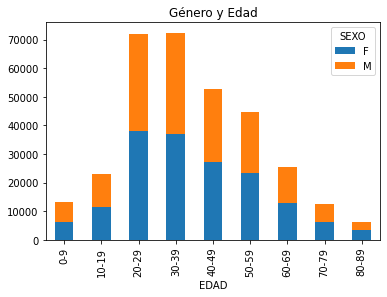

In [ ]:
genero_ob= pd.pivot_table(genero_ob,columns='SEXO',index='EDAD',values=0)
genero_ob.plot(kind="bar",title="Género y Edad",stacked=True)
plt.savefig('GeneroEdad.png')



> Localidades con mayor número de contagios



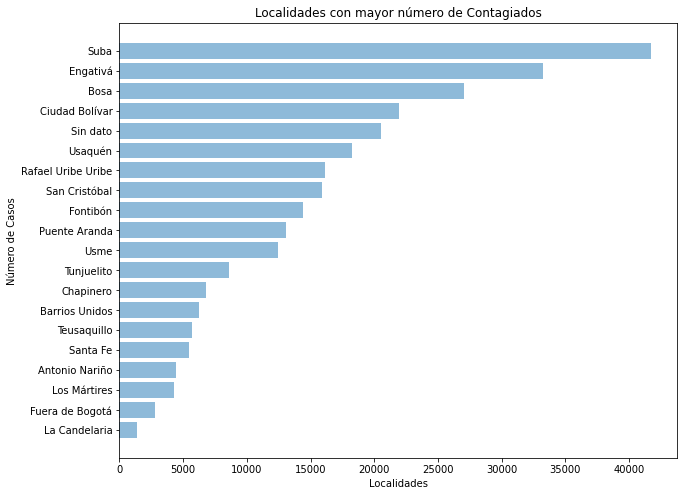

In [ ]:
import matplotlib
import numpy as np

local=local.sort_values(by='No. Casos',ascending=False) #Se ordena según el número de casos 
#Se hace una copia del data frame 
local1 = local.copy()
#Se organizan según el número de casos 
local1=local1.sort_values(by='No. Casos')
plt.figure(figsize=(10,8)) #Se establece el tamaño de la figura
#Colocamos etiquetas a los ejes
plt.xlabel("Localidades")                       
plt.ylabel("Número de Casos") 


#Creamos la grafica de barras utilizando 'Localidad' como eje X y 'Número de casos' como eje y.
x = local1['Localidades'].iloc[1:21]
y = local1['No. Casos'].iloc[1:21]
plt.title("Localidades con mayor número de Contagiados")
plt.barh(x, y, align='center', alpha=0.5)
#Finalmente mostramos la grafica con el metodo show()
plt.savefig('Localidades.png')
plt.show()

**Mapa por localidades de Bogotá**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file('/gdrive/My Drive/Colab Notebooks/poligonos-localidades.geojson')
gdf.head()

,Acto administrativo de la localidad,Nombre de la localidad,Area de la localidad,Identificador unico de la localidad,geometry
0,Acuerdo 117 de 2003,ANTONIO NARIÑO,"4879543,386426",15,"MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4..."
1,Acuerdo 8 de 1977,TEUSAQUILLO,"14193168,127546",13,"MULTIPOLYGON (((-74.09372 4.66607, -74.10342 4..."
2,Acuerdo 9 de 1986,SUMAPAZ,"780968757,719072",20,"MULTIPOLYGON (((-74.20584 4.26966, -74.20567 4..."
3,Acuerdo 117 de 2003,SAN CRISTOBAL,"49098548,52917",04,"MULTIPOLYGON (((-74.02900 4.55830, -74.02892 4..."
4,Acuerdo 8 de 1977,USAQUEN,"65315721,646621",01,"MULTIPOLYGON (((-74.01089 4.66358, -74.01077 4..."


In [ ]:
gdf=gdf.sort_values(by='Nombre de la localidad') #Se ordenan según la localidad
gdf = gdf.reset_index(drop=True)
gdf.head()

,Acto administrativo de la localidad,Nombre de la localidad,Area de la localidad,Identificador unico de la localidad,geometry
0,Acuerdo 117 de 2003,ANTONIO NARIÑO,"4879543,386426",15,"MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4..."
1,Acuerdo 8 de 1977,BARRIOS UNIDOS,"11903448,204872",12,"MULTIPOLYGON (((-74.05725 4.68684, -74.05725 4..."
2,Acuerdo 14 de 1983,BOSA,"23933196,086856",07,"MULTIPOLYGON (((-74.18567 4.64705, -74.18568 4..."
3,Acuerdo 117 de 2003,CANDELARIA,"2060242,920452",17,"MULTIPOLYGON (((-74.06621 4.60317, -74.06621 4..."
4,Acuerdo 8 de 1977,CHAPINERO,"38155857,205938",02,"MULTIPOLYGON (((-74.01089 4.66358, -74.01090 4..."


In [ ]:
localidades=[] 
x=bta_df['LOCALIDAD_ASIS']  
c=Counter(x) #Se cuentan los datos según las localidades
local = pd.DataFrame() #Se crea una nueva referencia del DataFrame
local['Localidades']=c.keys() #Se extraen los elementos únicos
local['No. Casos']=c.values() #Se extrae la frecuencia de cada elemento único
local = local.replace({'La Candelaria':'Candelaria'})
local = local.replace({'Fuera de Bogotá':'Sumapaz'})
local = local.sort_values(by='Localidades')
local = local.reset_index(drop=True)
local = local.drop([14], axis=0)
local = local.reset_index(drop=True)
local['Localidades']

0         Antonio Nariño
1         Barrios Unidos
2                   Bosa
3             Candelaria
4              Chapinero
5         Ciudad Bolívar
6               Engativá
7               Fontibón
8                Kennedy
9           Los Mártires
10         Puente Aranda
11    Rafael Uribe Uribe
12         San Cristóbal
13              Santa Fe
14                  Suba
15               Sumapaz
16           Teusaquillo
17            Tunjuelito
18               Usaquén
19                  Usme
20                  None
Name: Localidades, dtype: object

In [ ]:
gdf['No. Casos'] = local['No. Casos']
gdf.head()

,Acto administrativo de la localidad,Nombre de la localidad,Area de la localidad,Identificador unico de la localidad,geometry,No. Casos
0,Acuerdo 117 de 2003,ANTONIO NARIÑO,"4879543,386426",15,"MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4...",4428
1,Acuerdo 8 de 1977,BARRIOS UNIDOS,"11903448,204872",12,"MULTIPOLYGON (((-74.05725 4.68684, -74.05725 4...",6281
2,Acuerdo 14 de 1983,BOSA,"23933196,086856",07,"MULTIPOLYGON (((-74.18567 4.64705, -74.18568 4...",27018
3,Acuerdo 117 de 2003,CANDELARIA,"2060242,920452",17,"MULTIPOLYGON (((-74.06621 4.60317, -74.06621 4...",1349
4,Acuerdo 8 de 1977,CHAPINERO,"38155857,205938",02,"MULTIPOLYGON (((-74.01089 4.66358, -74.01090 4...",6808


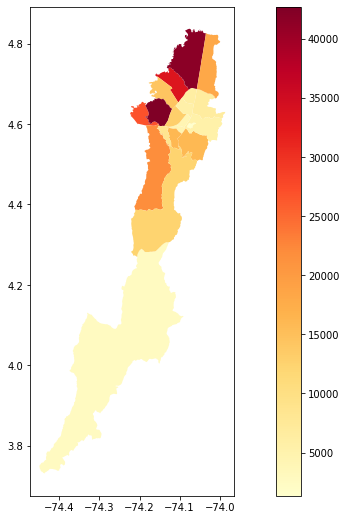

In [ ]:
gdf.plot(column='No. Casos', cmap='YlOrRd', legend=True, figsize=(15,9));
plt.savefig('Casos por localidad Bogota.png') #Se guarda la imagen